# Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Data

In [2]:
titanic_data = sns.load_dataset('titanic')

titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Data preparation

### Check null values

In [3]:
titanic_data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### Treatment of null values

In [4]:
titanic_data.drop(['age', 'deck'], axis=1, inplace=True)

titanic_data = titanic_data.dropna()

titanic_data.isnull().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

### Select data

In [5]:
data = titanic_data[['pclass', 'sex', 'sibsp', 'parch', 'embarked', 'who', 'alone']].copy()

data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,male,1,0,S,man,False
1,1,female,1,0,C,woman,False
2,3,female,0,0,S,woman,True
3,1,female,1,0,S,woman,False
4,3,male,0,0,S,man,True


### Convert data

In [6]:
sex = {'male':0, 'female':1}
data['sex'] = data['sex'].map(sex)

ports = {'S':0, 'C':1, 'Q':2}
data['embarked'] = data['embarked'].map(ports)

who = {'man':0, 'woman':1, 'child':2}
data['who'] = data['who'].map(who)

alone = {True:1, False:0}
data['alone'] = data['alone'].map(alone)

data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,0,1,0,0,0,0
1,1,1,1,0,1,1,0
2,3,1,0,0,0,1,1
3,1,1,1,0,0,1,0
4,3,0,0,0,0,0,1


# Variables

In [7]:
X = data.copy()

y = titanic_data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Feature selection

### Chi square filter

<AxesSubplot:>

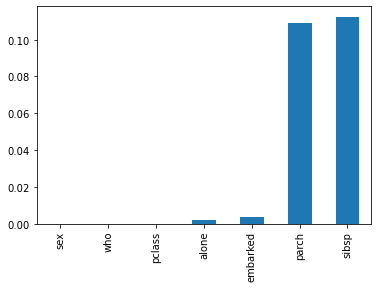

In [8]:
chi2_test = chi2(X_train, y_train)

p_values = pd.Series(chi2_test[1], index=X_train.columns) # Selecting just the p-values from Chi Square test

p_values.sort_values(ascending=True, inplace=True)

p_values.plot.bar()

# Model

In [9]:
def random_forest_model(X_train, X_test, y_train, y_test):
    random_forest_model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    random_forest_model.fit(X_train, y_train)
    prediction = random_forest_model.predict(X_test)
    print('Model accuracy:', accuracy_score(y_test, prediction))

### Comparing models performance

In [10]:
# Selecting the two features with the lowest p-values
X_train_2 = X_train[['who', 'sex']]
X_test_2 = X_test[['who', 'sex']]

# Selecting the three features with the lowest p-values
X_train_3 = X_train[['who', 'sex', 'pclass']]
X_test_3 = X_test[['who', 'sex', 'pclass']]

# Selecting the four features with the lowest p-values
X_train_4 = X_train[['who', 'sex', 'pclass', 'embarked']]
X_test_4 = X_test[['who', 'sex', 'pclass', 'embarked']]

In [11]:
%%time

print('- Model with two features selected -')

random_forest_model(X_train_2, X_test_2, y_train, y_test)

- Model with two features selected -
Model accuracy: 0.7528089887640449
Wall time: 299 ms


In [12]:
%%time

print('- Model with three features selected -')

random_forest_model(X_train_3, X_test_3, y_train, y_test)

- Model with three features selected -
Model accuracy: 0.7640449438202247
Wall time: 268 ms


In [13]:
%%time

print('- Model with four features selected -')

random_forest_model(X_train_4, X_test_4, y_train, y_test)

- Model with four features selected -
Model accuracy: 0.8202247191011236
Wall time: 270 ms


In [14]:
%%time

print('- Model without feature selection -')

print('Number of features:', X_train.shape[1])

random_forest_model(X_train, X_test, y_train, y_test)

- Model without feature selection -
Number of features: 7
Model accuracy: 0.8258426966292135
Wall time: 269 ms
